In [2]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract
import spacy

In [12]:
img_cv = cv2.imread("./Selected/233.jpeg")
cv2.imshow('bill-example',img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img_pl = PIL.Image.open("./Selected/233.jpeg")
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

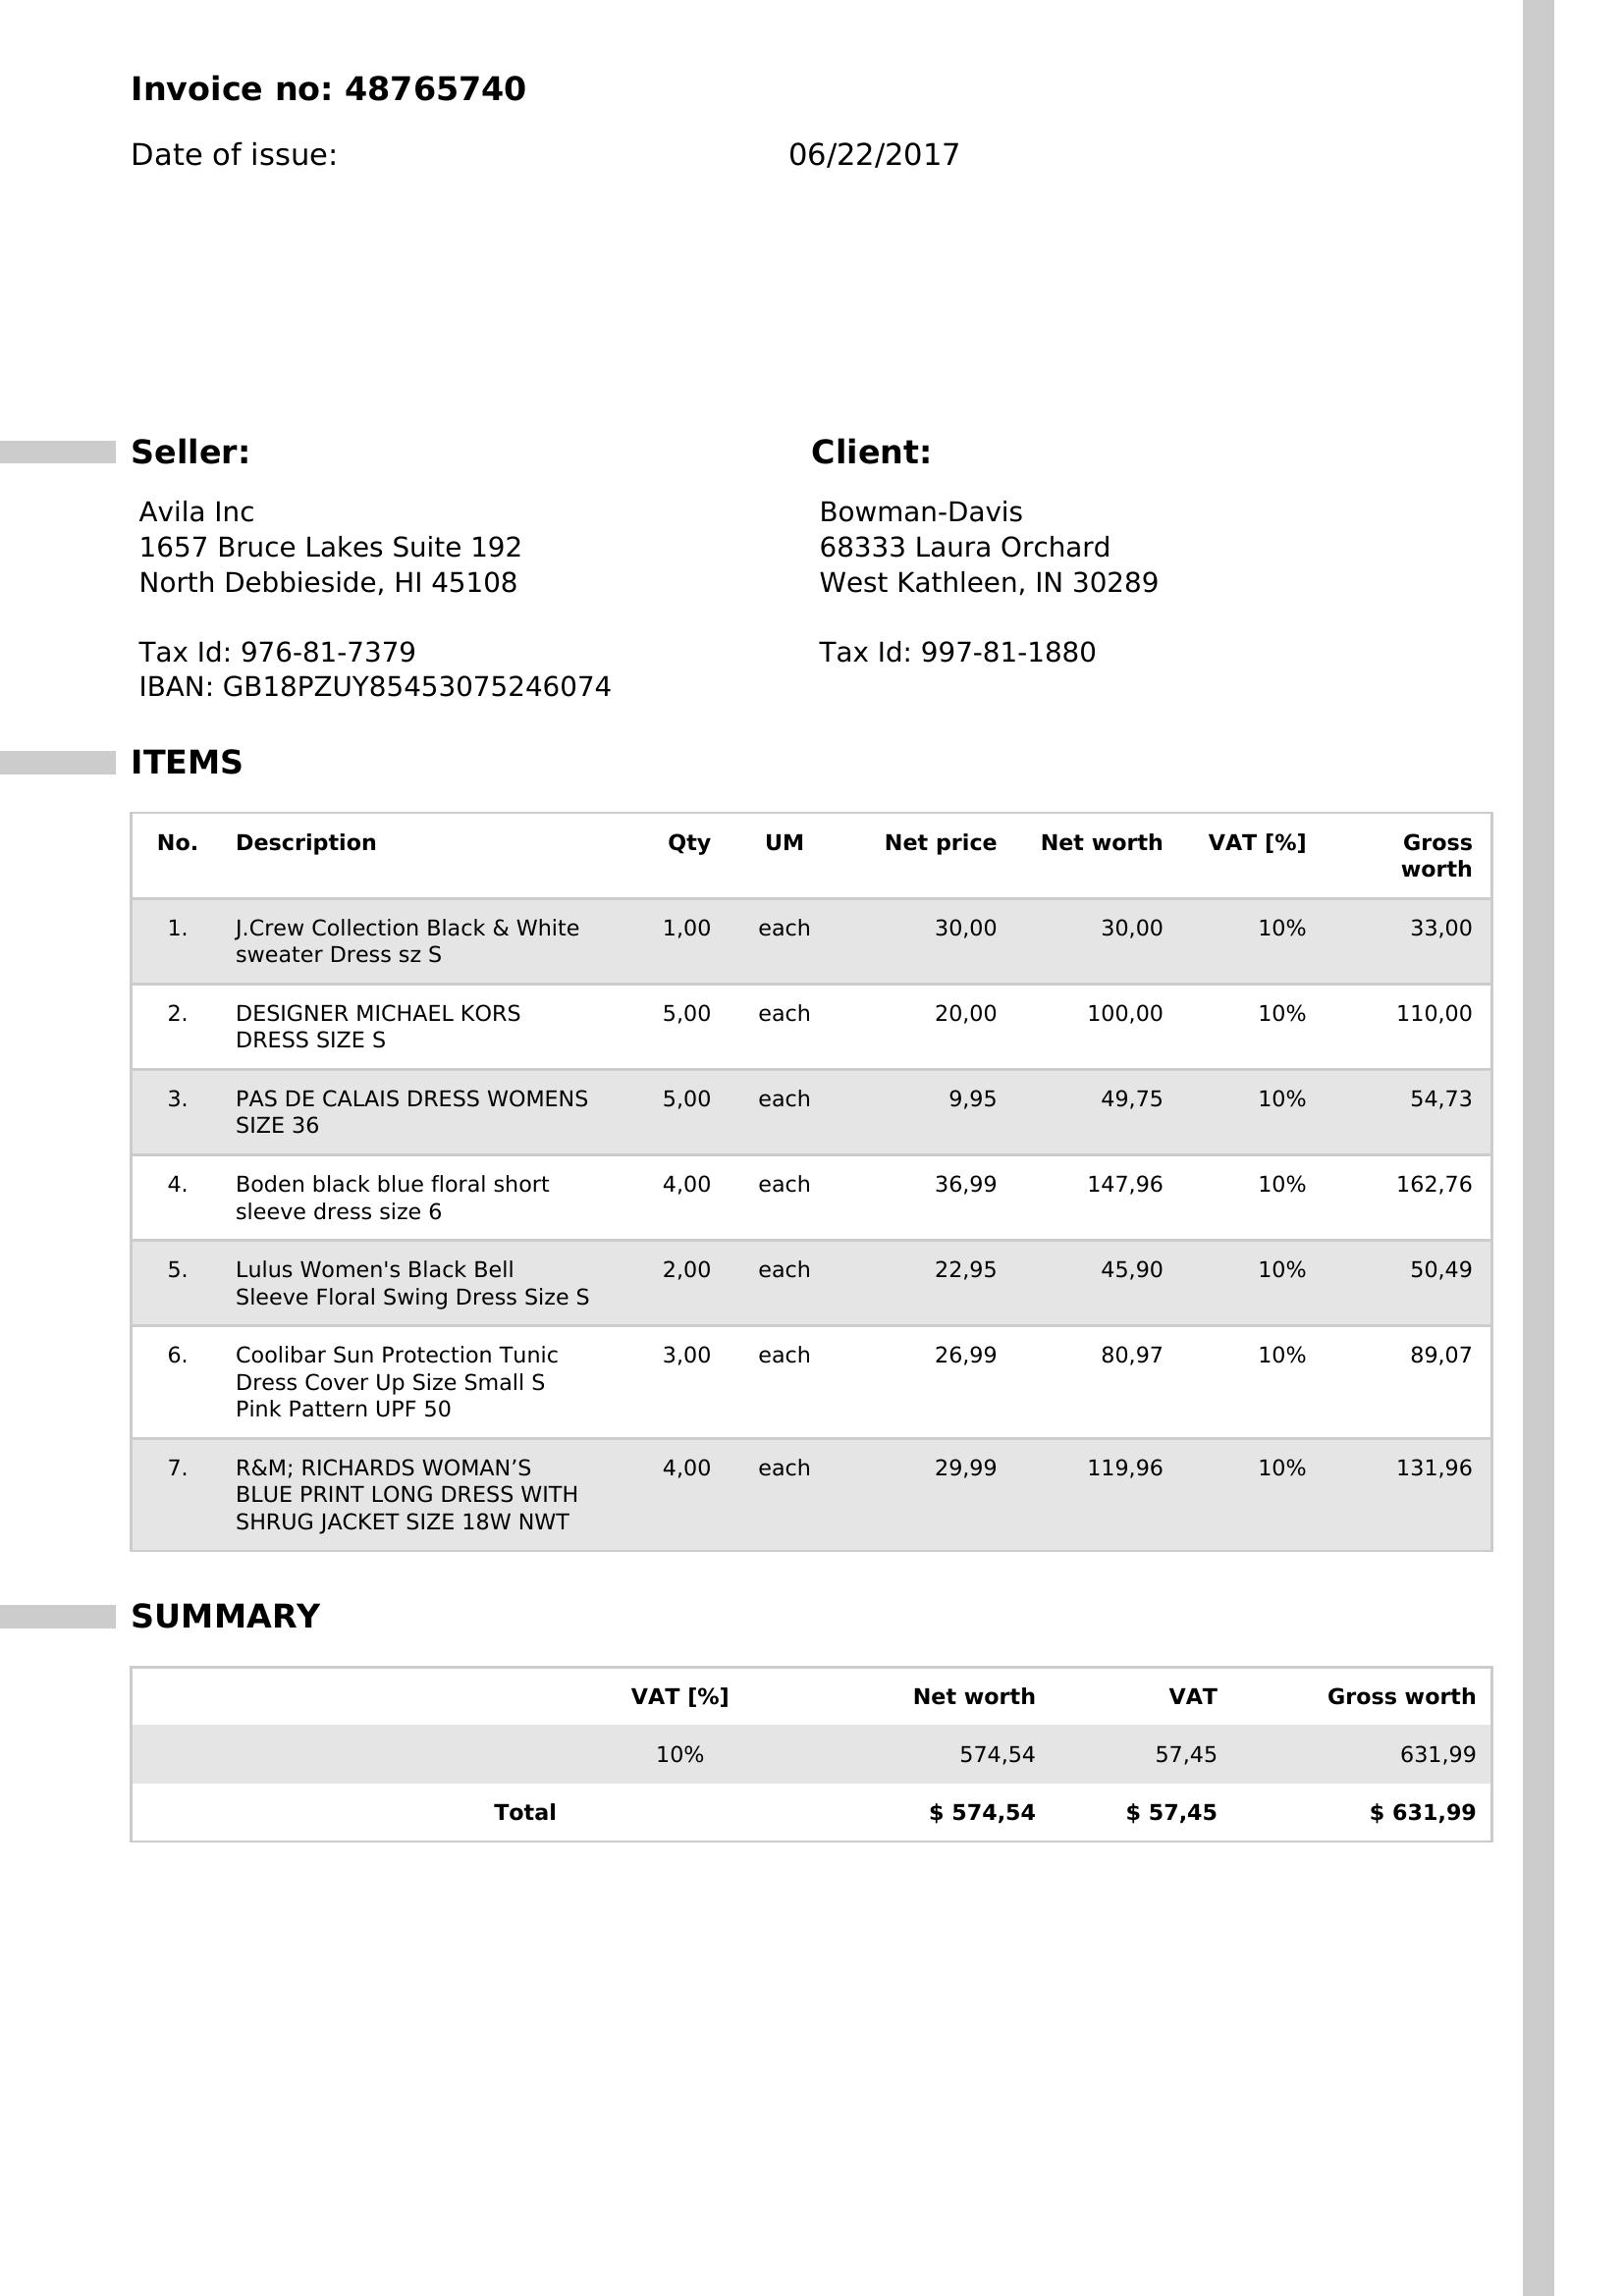

In [11]:
img_pl

In [13]:
text_cv =pytesseract.image_to_string(img_cv)

In [14]:
print(text_cv)

Invoice no: 48765740

Date of issue:

Seller:

Avila Inc
1657 Bruce Lakes Suite 192
North Debbieside, HI 45108

Tax Id: 976-81-7379
IBAN: GB18PZUY85453075246074

ITEMS

No. Description Qty

tks J.Crew Collection Black & White 1,00
sweater Dress sz S

2. DESIGNER MICHAEL KORS 5,00
DRESS SIZE S

23 PAS DE CALAIS DRESS WOMENS 5,00
SIZE 36

4. Boden black blue floral short 4,00

sleeve dress size 6

Se Lulus Women's Black Bell 2,00
Sleeve Floral Swing Dress Size S

6. Coolibar Sun Protection Tunic 3,00
Dress Cover Up Size Small S
Pink Pattern UPF 50

de R&M; RICHARDS WOMAN’S 4,00
BLUE PRINT LONG DRESS WITH
SHRUG JACKET SIZE 18W NWT

SUMMARY

VAT [%]
10%

Total

06/22/2017

UM

eacn

eacn

eacn

eac

eacn

eacn

 

eacn

Client:

Bowman-Davis
68333 Laura Orchard
West Kathleen, IN 30289

Tax Id: 997-81-1880

Net price Net worth VAT [%]
30,00 30,00 10%
20,00 100,00 10%

9,95 49,75 10%
36,99 147,96 10%
22,95 45,90 10%
26,99 80,97 10%
29,99 119,96 10%

Net worth VAT
574,54 57,45
$ 574,54 $ 57,4

In [15]:
data = pytesseract.image_to_data(img_cv)

In [25]:
# data.split('\n')
dataList = list(map(lambda x: x.split('\t'), data.split('\n')))
df = pd.DataFrame(dataList[1:], columns = dataList[0])

In [29]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1654,2339,-1,
1,2,1,1,0,0,0,136,77,399,26,-1,
2,3,1,1,1,0,0,136,77,399,26,-1,
3,4,1,1,1,1,0,136,77,399,26,-1,
4,5,1,1,1,1,1,136,77,130,26,96,Invoice
5,5,1,1,1,1,2,283,83,53,20,95,no:
6,5,1,1,1,1,3,352,77,183,26,95,48765740
7,2,1,2,0,0,0,136,145,205,23,-1,
8,3,1,2,1,0,0,136,145,205,23,-1,
9,4,1,2,1,1,0,136,145,205,23,-1,


In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   level      341 non-null    str  
 1   page_num   340 non-null    str  
 2   block_num  340 non-null    str  
 3   par_num    340 non-null    str  
 4   line_num   340 non-null    str  
 5   word_num   340 non-null    str  
 6   left       340 non-null    str  
 7   top        340 non-null    str  
 8   width      340 non-null    str  
 9   height     340 non-null    str  
 10  conf       340 non-null    str  
 11  text       340 non-null    str  
dtypes: str(12)
memory usage: 32.1 KB


In [31]:
df.dropna(inplace = True)
col_int = ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf']
df[col_int] = df[col_int].astype(int)

In [35]:
df.dtypes

level        int64
page_num     int64
block_num    int64
par_num      int64
line_num     int64
word_num     int64
left         int64
top          int64
width        int64
height       int64
conf         int64
text           str
dtype: object

In [52]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left', 'top', 'width', 'height', 'conf', 'text']].values:
    # print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1 :
            cv2.rectangle(image,(x,y),(x+w,y+h), (133,55,66), 2)
        else:
            continue
    elif level == 'block':
            if l == 2:
                cv2.rectangle(image,(x,y),(x+w,y+h), (255,55,66), 2)
            else:
                continue
    elif level == 'para':
            if l == 3:
                cv2.rectangle(image,(x,y),(x+w,y+h), (255,105,76), 2)
            else:
                continue
    elif level == 'line':
            if l == 4:
                cv2.rectangle(image,(x,y),(x+w,y+h), (255,188,76), 2)
            else:
                continue    
    elif level == 'word':
            if l == 5:
                cv2.rectangle(image,(x,y),(x+w,y+h), (133,14,76), 2)
                cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
            else:
                continue    

cv2.imshow('boundary box', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
            